In [1]:
import pandas as pd
import numpy as np
from utils import config_paths, find_non_numeric_cols, find_null_cols, find_null_cols_pct, classify_null_cols, drop_null_cols, impute_missing_values_numeric, impute_missing_values_ordinal, encode_nominal_features, imput_missing_values_nominal, k_fold_cross_validation, plot_lasso_ridge_errors
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [2]:
# display max columns to see all columns
pd.set_option("display.max_columns", None)

In [3]:
proj_root = config_paths["proj_root"]
data_dir = config_paths["data_dir"]
bronze_dir = config_paths["bronze_dir"]

In [4]:
df_train = pd.read_csv(f"{bronze_dir}/codetest_train.txt", sep="\t")
df_test = pd.read_csv(f"{bronze_dir}/codetest_test.txt", sep="\t")

In [5]:
df_train

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
0,3.066056,-0.653,0.255,-0.615,-1.833,-0.736,NaN,1.115,-0.171,-0.351,-0.129,-0.268,0.367,-0.033,2.359,-0.469,-0.214,0.896,1.245,1.852,1.438,0.454,0.051,-0.076,0.308,-1.439,0.560,0.167,-0.719,0.475,-1.586,-2.020,-0.497,-0.946,2.394,1.181,0.463,1.789,-0.173,0.545,0.228,-1.132,-0.421,1.456,-0.727,0.189,1.809,-0.180,-0.245,0.144,-1.125,-0.587,0.669,-0.976,-0.361,0.702,0.535,-0.189,0.438,-0.907,NaN,1.330,b,-0.037,-0.100,0.983,0.634,-0.914,-1.627,0.791,-1.158,0.221,0.493,-1.055,-0.491,0.172,0.098,-1.135,-0.941,0.368,-0.006,-0.919,-0.978,-0.468,0.248,-0.659,-1.612,-1.857,0.996,-0.323,1.296,0.982,0.459,-0.759,-0.116,0.734,-2.218,-1.701,0.247,0.890,0.089,1.709,0.115,0.996,0.770,0.182,-1.061,-0.966,0.596,NaN,1.645,2.074,-0.517,0.667,-1.007,-0.588,0.836,NaN,0.183,-0.202,0.409,1.171,D,1.019,-0.522,0.286,-0.431,0.730,0.861,1.834,-2.278,-0.626,NaN,-0.050,-1.372,-1.134,0.778,1.915,0.197,0.564,-0.518,-0.057,1.204,-1.306,-0.302,0.440,-0.572,-0.818,-0.731,-2.168,NaN,-0.895,0.428,-0.981,0.361,0.777,0.800,-2.109,-1.287,0.780,1.422,0.170,-0.371,-2.303,0.362,0.521,-0.761,1.642,-1.261,1.424,0.866,0.341,-0.877,NaN,-1.393,0.366,0.639,-1.657,0.468,0.120,0.228,1.920,-1.542,-0.178,0.748,0.243,0.988,-0.030,1.047,-1.062,0.585,-2.081,-1.119,-1.095,1.619,1.262,0.539,-0.782,-2.092,-1.359,-1.226,1.587,1.993,-0.028,-2.500,-2.004,-0.789,-0.171,-0.061,-0.164,1.681,0.478,1.421,-0.470,0.202,NaN,red,1.190,0.211,-0.081,0.256,-0.644,0.868,0.604,0.212,0.460,-0.942,0.525,0.836,0.973,-0.050,NaN,0.620,-0.781,-0.909,0.943,1.153,1.331,Canada,0.793,NaN,0.261,0.664,0.585,-0.384,-1.607,-1.400,-0.920,-0.198,-0.945,-0.573,0.170,-0.418,-1.244,-0.503
1,-1.910473,1.179,-0.093,-0.556,0.811,-0.468,-0.005,-0.116,-1.243,1.985,-1.019,0.121,0.782,-0.323,-1.156,-1.198,1.091,-0.037,-1.550,-0.638,-1.080,-1.061,-0.804,0.001,NaN,-0.505,1.151,-0.155,1.482,-1.647,-0.776,1.337,0.237,-1.017,-0.688,2.026,0.670,-1.772,NaN,-1.542,-2.249,-0.086,-0.510,1.531,0.051,-0.002,-0.441,-0.378,0.901,0.267,0.193,0.327,0.391,-0.789,-0.230,0.235,2.268,0.044,0.769,-0.488,-1.586,0.566,a,-0.838,0.450,1.992,-1.696,2.276,0.234,1.058,1.169,0.080,0.265,0.841,-1.232,-1.675,0.423,-0.575,0.913,1.630,1.521,-0.346,-1.154,-1.340,0.788,0.697,-0.023,2.952,1.081,0.506,-0.421,-0.066,-0.984,0.945,1.600,-0.445,0.569,0.813,0.958,-0.742,0.331,0.881,-1.144,-0.036,-2.327,1.885,-0.955,-0.026,1.781,-0.312,-0.407,0.097,-1.521,-1.841,-0.435,1.250,0.340,-1.664,0.048,-0.309,1.472,1.385,A,-0.941,-0.692,-0.117,1.178,-0.988,-0.703,0.604,1.217,-0.712,0.601,0.364,-0.967,1.510,-1.512,0.088,-0.368,-1.181,-1.805,-1.596,-0.745,-0.934,0.779,0.532,1.812,-1.5

In [6]:
df_train.describe()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
count,5000.000000,4903.000000,4928.000000,4908.000000,4910.000000,4907.000000,4912.000000,4897.000000,4904.000000,4893.000000,4911.000000,4896.000000,4898.000000,4903.000000,4907.000000,4919.000000,4878.000000,4903.000000,4906.000000,4906.000000,4887.000000,4905.000000,4895.000000,4891.000000,4893.000000,4917.000000,4916.000000,4914.000000,4892.000000,4898.000000,4909.000000,4903.000000,4906.000000,4897.000000,4893.000000,4892.000000,4889.000000,4906.000000,4903.000000,4908.000000,4899.000000,4896.000000,4898.000000,4913.000000,4899.000000,4895.000000,4900.000000,4900.000000,4898.000000,4928.000000,4896.000000,4898.000000,4916.000000,4899.000000,4898.000000,4901.000000,4882.000000,4896.000000,4903.000000,4916.000000,4882.000000,4906.000000,4902.000000,4912.000000,4900.000000,4909.000000,4895.000000,4906.000000,4917.000000,4908.000000,4909.000000,4868.000000,4891.000000,4897.000000,4899.000000,4890.000000,4902.000000,4906.000000,4889.000000,4888.000000,4918.000000,4892.000000,4911.000000,4904.000000,4885.000000,4882.000000,4892.000000,4913.000000,4919.000000,4913.000000,4915.000000,4909.000000,4908.000000,4907.000000,4899.000000,4896.000000,4912.000000,4914.000000,4888.000000,4913.000000,4887.000000,4890.000000,4904.000000,4894.000000,4896.000000,4901.000000,4896.000000,4903.000000,4887.000000,4897.000000,4884.000000,4901.000000,4890.000000,4919.000000,4896.000000,4899.000000,4907.000000,4904.000000,4905.000000,4899.000000,4918.000000,4914.000000,4896.000000,4901.000000,4883.000000,4886.000000,4903.000000,4906.000000,4897.000000,4914.000000,4892.000000,4889.000000,4904.000000,4889.000000,4896.000000,4884.000000,4889.000000,4898.000000,4907.000000,4903.000000,4908.000000,4889.000000,4900.000000,4909.000000,4904.000000,4907.000000,4903.000000,4899.000000,4899.000000,4902.000000,4913.000000,4896.000000,4883.000000,4891.000000,4892.000000,4906.000000,4876.000000,4897.000000,4884.000000,4906.000000,4906.000000,4885.000000,4897.000000,4912.000000,4896.000000,4884.000000,4895.000000,4889.000000,4909.000000,4894.000000,4914.000000,4895.000000,4911.000000,4903.000000,4898.000000,4902.000000,4905.000000,4899.000000,4901.000000,4899.000000,4890.000000,4909.000000,4920.000000,4902.000000,4888.000000,4900.000000,4910.000000,4907.000000,4914.000000,4898.000000,4909.000000,4914.000000,4892.000000,4900.000000,4914.000000,4889.000000,4891.000000,4916.000000,4896.000000,4907.00000,4869.000000,4900.000000,4894.000000,4913.000000,4903.000000,4908.000000,4894.000000,4898.000000,4904.000000,4907.000000,4879.000000,4894.000000,4909.000000,4917.000000,4897.000000,4903.000000,4893

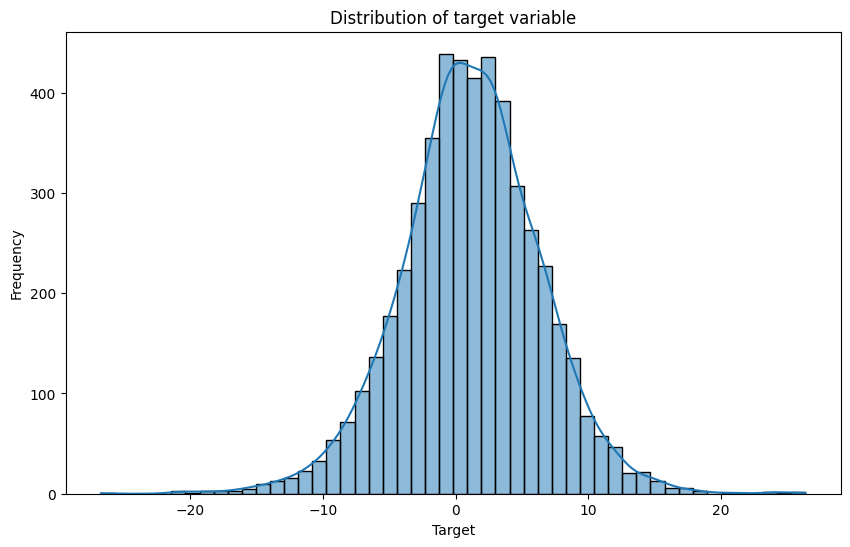

In [7]:
# Explore distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(df_train["target"], bins=50, kde=True)
plt.title("Distribution of target variable")
plt.xlabel("Target")
plt.ylabel("Frequency")
plt.show()
# Target variable seems approximately normally distributed

In [8]:
null_cols = find_null_cols(df_train)
null_cols_class = classify_null_cols(df=df_train, null_cols=null_cols)
null_cols_num = null_cols_class["numerical"]
null_cols_cat = null_cols_class["categorical"]

In [9]:
null_pct_df = find_null_cols_pct(df_train)
null_pct_df[null_pct_df["null_count"] > 0]

,null_pct,null_count
f_0,0.0194,97
f_1,0.0144,72
f_2,0.0184,92
f_3,0.0180,90
f_4,0.0186,93
...,...,...
f_249,0.0228,114
f_250,0.0200,100
f_251,0.0158,79
f_252,0.0192,96


In [10]:
null_pct_df = find_null_cols_pct(df_test)
null_pct_df[null_pct_df["null_count"] > 0]

,null_pct,null_count
f_0,0.028,28
f_1,0.017,17
f_2,0.017,17
f_3,0.018,18
f_4,0.022,22
...,...,...
f_249,0.020,20
f_250,0.019,19
f_251,0.022,22
f_252,0.021,21


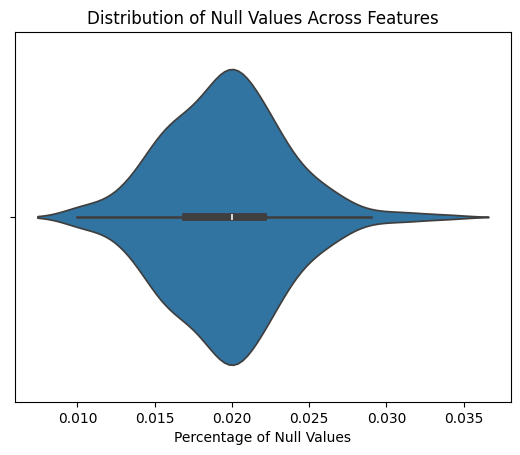

In [11]:
# Plot distribution of null values to explore range and concentration of missing data across all features
sns.violinplot(x=null_pct_df["null_pct"])
plt.xlabel("Percentage of Null Values")
plt.title("Distribution of Null Values Across Features")
plt.show()

#### Encoding Categorical variables

In [12]:
df_train_clean = drop_null_cols(df_train, null_cols_num)

In [13]:
df_train_clean.head()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
0,3.066056,-0.653,0.255,-0.615,-1.833,-0.736,NaN,1.115,-0.171,-0.351,-0.129,-0.268,0.367,-0.033,2.359,-0.469,-0.214,0.896,1.245,1.852,1.438,0.454,0.051,-0.076,0.308,-1.439,0.560,0.167,-0.719,0.475,-1.586,-2.020,-0.497,-0.946,2.394,1.181,0.463,1.789,-0.173,0.545,0.228,-1.132,-0.421,1.456,-0.727,0.189,1.809,-0.180,-0.245,0.144,-1.125,-0.587,0.669,-0.976,-0.361,0.702,0.535,-0.189,0.438,-0.907,NaN,1.330,b,-0.037,-0.100,0.983,0.634,-0.914,-1.627,0.791,-1.158,0.221,0.493,-1.055,-0.491,0.172,0.098,-1.135,-0.941,0.368,-0.006,-0.919,-0.978,-0.468,0.248,-0.659,-1.612,-1.857,0.996,-0.323,1.296,0.982,0.459,-0.759,-0.116,0.734,-2.218,-1.701,0.247,0.890,0.089,1.709,0.115,0.996,0.770,0.182,-1.061,-0.966,0.596,NaN,1.645,2.074,-0.517,0.667,-1.007,-0.588,0.836,NaN,0.183,-0.202,0.409,1.171,D,1.019,-0.522,0.286,-0.431,0.730,0.861,1.834,-2.278,-0.626,NaN,-0.050,-1.372,-1.134,0.778,1.915,0.197,0.564,-0.518,-0.057,1.204,-1.306,-0.302,0.440,-0.572,-0.818,-0.731,-2.168,NaN,-0.895,0.428,-0.981,0.361,0.777,0.800,-2.109,-1.287,0.780,1.422,0.170,-0.371,-2.303,0.362,0.521,-0.761,1.642,-1.261,1.424,0.866,0.341,-0.877,NaN,-1.393,0.366,0.639,-1.657,0.468,0.120,0.228,1.920,-1.542,-0.178,0.748,0.243,0.988,-0.030,1.047,-1.062,0.585,-2.081,-1.119,-1.095,1.619,1.262,0.539,-0.782,-2.092,-1.359,-1.226,1.587,1.993,-0.028,-2.500,-2.004,-0.789,-0.171,-0.061,-0.164,1.681,0.478,1.421,-0.470,0.202,NaN,red,1.190,0.211,-0.081,0.256,-0.644,0.868,0.604,0.212,0.460,-0.942,0.525,0.836,0.973,-0.050,NaN,0.620,-0.781,-0.909,0.943,1.153,1.331,Canada,0.793,NaN,0.261,0.664,0.585,-0.384,-1.607,-1.400,-0.920,-0.198,-0.945,-0.573,0.170,-0.418,-1.244,-0.503
1,-1.910473,1.179,-0.093,-0.556,0.811,-0.468,-0.005,-0.116,-1.243,1.985,-1.019,0.121,0.782,-0.323,-1.156,-1.198,1.091,-0.037,-1.550,-0.638,-1.080,-1.061,-0.804,0.001,NaN,-0.505,1.151,-0.155,1.482,-1.647,-0.776,1.337,0.237,-1.017,-0.688,2.026,0.670,-1.772,NaN,-1.542,-2.249,-0.086,-0.510,1.531,0.051,-0.002,-0.441,-0.378,0.901,0.267,0.193,0.327,0.391,-0.789,-0.230,0.235,2.268,0.044,0.769,-0.488,-1.586,0.566,a,-0.838,0.450,1.992,-1.696,2.276,0.234,1.058,1.169,0.080,0.265,0.841,-1.232,-1.675,0.423,-0.575,0.913,1.630,1.521,-0.346,-1.154,-1.340,0.788,0.697,-0.023,2.952,1.081,0.506,-0.421,-0.066,-0.984,0.945,1.600,-0.445,0.569,0.813,0.958,-0.742,0.331,0.881,-1.144,-0.036,-2.327,1.885,-0.955,-0.026,1.781,-0.312,-0.407,0.097,-1.521,-1.841,-0.435,1.250,0.340,-1.664,0.048,-0.309,1.472,1.385,A,-0.941,-0.692,-0.117,1.178,-0.988,-0.703,0.604,1.217,-0.712,0.601,0.364,-0.967,1.510,-1.512,0.088,-0.368,-1.181,-1.805,-1.596,-0.745,-0.934,0.779,0.532,1.812,-1.5

In [14]:
# Considering most values in feature variables are numeric we can check for non-numeric columns in the dataset
non_numeric_cols = find_non_numeric_cols(df_train_clean)
non_numeric_cols

['f_61', 'f_121', 'f_215', 'f_237']

In [15]:
# Seems non-numeric columns are categorical variables - explore value counts for each of them and verify if they are ordinal or nominal
for col in non_numeric_cols:
    print("-------------------")
    print(f"Value counts for categorical {col}")
    print(df_train_clean[col].value_counts())
    print("-------------------")

-------------------
Value counts for categorical f_61
f_61
d    1015
b     982
c     979
e     975
a     954
Name: count, dtype: int64
-------------------
-------------------
Value counts for categorical f_121
f_121
B    837
E    830
A    829
C    815
F    803
D    800
Name: count, dtype: int64
-------------------
-------------------
Value counts for categorical f_215
f_215
red       1294
yellow    1224
orange    1198
blue      1182
Name: count, dtype: int64
-------------------
-------------------
Value counts for categorical f_237
f_237
Canada    1677
USA       1650
Mexico    1578
Name: count, dtype: int64
-------------------


In [16]:
df_train_clean.loc[:, ["target", "f_61", "f_121", "f_215", "f_237"]]

,target,f_61,f_121,f_215,f_237
0,3.066056,b,D,red,Canada
1,-1.910473,a,A,blue,Canada
2,7.830711,b,B,orange,Canada
3,-2.180862,a,C,blue,USA
4,5.462784,b,E,orange,Canada
...,...,...,...,...,...
4995,-1.371557,e,B,blue,Canada
4996,-3.120233,c,F,red,Canada
4997,0.013335,d,F,yellow,Mexico
4998,4.289620,d,C,blue,USA


##### Ordinal Encoding

In [17]:
# Primary assumption is - f_61 and f_121 are ordinal categorical variables (this might need business input to confirm) - use ordinal encoding to convert them to numeric and preserve null values as a separate category (-1)
ordinal_features = ["f_61", "f_121"]
f_61_categories = ["a", "b", "c", "d", "e"]
f_121_categories = ["A", "B", "C", "D", "E", "F"]
ord_encoder = OrdinalEncoder(categories=[f_61_categories, f_121_categories], handle_unknown="use_encoded_value", unknown_value=-1)
df_train_clean.loc[:, ordinal_features] = ord_encoder.fit_transform(df_train_clean[ordinal_features])

for col in ordinal_features:
    df_train_clean[col] = pd.to_numeric(df_train_clean[col])

In [18]:
# Encode test dataset
df_test_clean = df_test.copy()
df_test_clean.loc[:, ordinal_features] = ord_encoder.transform(df_test_clean[ordinal_features])
for col in ordinal_features:
    df_test_clean[col] = pd.to_numeric(df_test_clean[col])

##### Nominal Encoding

In [19]:
# f_215 and f_237 are nominal categorical variables - use one-hot encoding to convert them to numeric and preserve null values as a separate binary category
one_hot_enc_features = ["f_215", "f_237"]

# Note: also preserve these two columns to later use for imputation of missing values
nominal_features_train_df = df_train_clean.loc[:, one_hot_enc_features].copy()

df_train_clean, encoded_cols = encode_nominal_features(df_train_clean, one_hot_enc_features)

In [20]:
# Encode test dataset

# Note: also preserve these two columns to later use for imputation of missing values
nominal_features_test_df = df_test_clean.loc[:, one_hot_enc_features].copy()

df_test_clean = encode_nominal_features(df=df_test_clean, features=one_hot_enc_features)[0]

#### Missing data imputation using Light Gradient Boosting Regressor and classifier

In [21]:
df_train_clean = impute_missing_values_numeric(df_train_clean, null_cols_num)
df_test_clean = impute_missing_values_numeric(df_test_clean, null_cols_num)

[LightGBM] [Info] Total Bins 63777
[LightGBM] [Info] Number of data points in the train set: 4903, number of used features: 259
[LightGBM] [Info] Start training from score -0.000433
[LightGBM] [Info] Total Bins 63777
[LightGBM] [Info] Number of data points in the train set: 4928, number of used features: 259
[LightGBM] [Info] Start training from score 0.002564
[LightGBM] [Info] Total Bins 63777
[LightGBM] [Info] Number of data points in the train set: 4908, number of used features: 259
[LightGBM] [Info] Start training from score 0.028877
[LightGBM] [Info] Total Bins 63777
[LightGBM] [Info] Number of data points in the train set: 4910, number of used features: 259
[LightGBM] [Info] Start training from score -0.005437
[LightGBM] [Info] Total Bins 63777
[LightGBM] [Info] Number of data points in the train set: 4907, number of used features: 259
[LightGBM] [Info] Start training from score -0.006759
[LightGBM] [Info] Total Bins 63777
[LightGBM] [Info] Number of data points in the train set:

In [22]:
null_cols_ord = ["f_61", "f_121"]
df_train_clean = impute_missing_values_ordinal(df_train_clean, null_cols_ord)
df_test_clean = impute_missing_values_ordinal(df_test_clean, null_cols_ord)

[LightGBM] [Info] Total Bins 64026
[LightGBM] [Info] Number of data points in the train set: 4905, number of used features: 259
[LightGBM] [Info] Start training from score -1.637347
[LightGBM] [Info] Start training from score -1.608419
[LightGBM] [Info] Start training from score -1.611479
[LightGBM] [Info] Start training from score -1.575366
[LightGBM] [Info] Start training from score -1.615573
[LightGBM] [Info] Total Bins 64024
[LightGBM] [Info] Number of data points in the train set: 4914, number of used features: 259
[LightGBM] [Info] Start training from score -1.779623
[LightGBM] [Info] Start training from score -1.770019
[LightGBM] [Info] Start training from score -1.796655
[LightGBM] [Info] Start training from score -1.815232
[LightGBM] [Info] Start training from score -1.778418
[LightGBM] [Info] Start training from score -1.811489
[LightGBM] [Info] Total Bins 63769
[LightGBM] [Info] Number of data points in the train set: 985, number of used features: 257
[LightGBM] [Info] Start

In [23]:
df_train_clean = imput_missing_values_nominal(df=df_train_clean, nominal_features_df=nominal_features_train_df, encoded_features=encoded_cols, null_cols=one_hot_enc_features)
df_test_clean = imput_missing_values_nominal(df=df_test_clean, nominal_features_df=nominal_features_test_df, encoded_features=encoded_cols, null_cols=one_hot_enc_features)

[LightGBM] [Info] Total Bins 64022
[LightGBM] [Info] Number of data points in the train set: 4898, number of used features: 256
[LightGBM] [Info] Start training from score -1.421619
[LightGBM] [Info] Start training from score -1.408173
[LightGBM] [Info] Start training from score -1.331089
[LightGBM] [Info] Start training from score -1.386703
[LightGBM] [Info] Total Bins 64022
[LightGBM] [Info] Number of data points in the train set: 4905, number of used features: 256
[LightGBM] [Info] Start training from score -1.073249
[LightGBM] [Info] Start training from score -1.134097
[LightGBM] [Info] Start training from score -1.089480
[LightGBM] [Info] Total Bins 63767
[LightGBM] [Info] Number of data points in the train set: 981, number of used features: 255
[LightGBM] [Info] Start training from score -1.305076
[LightGBM] [Info] Start training from score -1.379184
[LightGBM] [Info] Start training from score -1.407934
[LightGBM] [Info] Start training from score -1.459227
[LightGBM] [Info] Total

In [24]:
df_train_clean

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253,f_215_orange,f_215_red,f_215_yellow,f_237_Mexico,f_237_USA
0,3.066056,-0.653,0.255,-0.615,-1.833,-0.736,0.028048,1.115,-0.171,-0.351,-0.129,-0.268,0.367,-0.033,2.359,-0.469,-0.214,0.896,1.245,1.852,1.438,0.454000,0.051,-0.076000,0.308000,-1.439,0.560,0.167,-0.719,0.475,-1.586,-2.020,-0.497,-0.946,2.394,1.181,0.463,1.789,-0.173000,0.545,0.228,-1.132,-0.421,1.456,-0.727,0.189,1.809,-0.180,-0.245,0.144,-1.125,-0.587,0.669,-0.976,-0.361,0.702,0.535,-0.189000,0.438000,-0.907,0.053264,1.330,1.0,-0.037,-0.100,0.983,0.634,-0.914,-1.627,0.791,-1.158,0.221,0.493,-1.055,-0.491,0.172,0.098000,-1.135,-0.941,0.368,-0.006,-0.919,-0.978,-0.468,0.248000,-0.659,-1.612,-1.857,0.996,-0.323,1.296,0.982,0.459,-0.759,-0.116,0.734,-2.218,-1.701,0.24700,0.890,0.089,1.709,0.115,0.996,0.770,0.182,-1.061,-0.966000,0.596000,0.45651,1.645,2.074,-0.517000,0.667000,-1.007,-0.588,0.836,-0.14664,0.183,-0.202,0.409,1.171,3.0,1.019,-0.522,0.286000,-0.431000,0.730,0.861,1.834,-2.278000,-0.626,-0.457813,-0.050,-1.372,-1.134,0.778,1.915,0.197,0.564,-0.518,-0.057000,1.204,-1.306,-0.302,0.440,-0.572,-0.818,-0.731,-2.168,0.52635,-0.895,0.428,-0.981,0.361,0.777000,0.800,-2.109000,-1.287,0.780,1.422,0.170,-0.371,-2.303,0.362000,0.521,-0.761,1.642,-1.261,1.424,0.866,0.341,-0.877,0.035693,-1.393,0.366000,0.639,-1.657,0.468,0.120,0.228,1.920,-1.542,-0.178,0.748,0.243,0.988,-0.030000,1.047,-1.062,0.585,-2.081,-1.119,-1.095,1.619,1.262,0.539000,-0.782,-2.09200,-1.359,-1.226,1.587,1.993000,-0.028000,-2.500,-2.004,-0.789,-0.171,-0.061000,-0.164,1.681,0.478000,1.421000,-0.470000,0.202,-0.308419,1.190,0.211,-0.081,0.256,-0.644,0.868,0.604,0.212,0.460,-0.942,0.525000,0.836,0.973000,-0.050,-0.106268,0.620000,-0.781,-0.909,0.943,1.153,1.331,0.793,-0.194207,0.261,0.664,0.585,-0.384,-1.607,-1.400,-0.920,-0.19800,-0.945,-0.573,0.170,-0.418,-1.244,-0.503,0.0,1.0,0.0,0.0,0.0
1,-1.910473,1.179,-0.093,-0.556,0.811,-0.468,-0.005000,-0.116,-1.243,1.985,-1.019,0.121,0.782,-0.323,-1.156,-1.198,1.091,-0.037,-1.550,-0.638,-1.080,-1.061000,-0.804,0.001000,-0.338061,-0.505,1.151,-0.155,1.482,-1.647,-0.776,1.337,0.237,-1.017,-0.688,2.026,0.670,-1.772,0.641428,-1.542,-2.249,-0.086,-0.510,1.531,0.051,-0.002,-0.441,-0.378,0.901,0.267,0.193,0.327,0.391,-0.789,-0.230,0.235,2.268,0.044000,0.769000,-0.488,-1.586000,0.566,0.0,-0.838,0.450,1.992,-1.696,2.276,0.234,1.058,1.169,0.080,0.265,0.841,-1.232,-1.675,0.423000,-0.575,0.913,1.630,1.521,-0.346,-1.154,-1.340,0.788000,0.697,-0.023,2.952,1.081,0.506,-0.421,-0.066,-0.984,0.945,1.600,-0.445,0.569,0.813,0.95800,-0.742,0.331,0.881,-1.144,-0.036,-2.327,1.885,-0.955,-0.026000,1.

In [25]:
df_test_clean

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253,f_215_orange,f_215_red,f_215_yellow,f_237_Mexico,f_237_USA
0,1.122,2.372,-1.303,-0.421,-1.724000,0.206,0.449,1.305000,-0.344,0.307,-0.802,1.464,0.528,0.354,0.283548,-2.004,0.213,0.415,-0.960,0.310,-0.097,-0.702,0.488,-0.522,0.257,-0.446000,-1.023,0.335,1.430,0.073,0.429,0.418,1.191,0.041,-0.604,0.547,-0.161,-1.297,-0.843,0.604,0.021000,1.125000,-0.168,-1.286,0.185,-0.428,-0.259,-0.367,0.493,0.673,0.866,-0.693,1.241,-0.583,-0.339,-0.763,-0.640,0.560,0.431,0.749,-1.248,4.0,0.111,-2.004,0.313,0.685,0.673,-0.903,1.076,0.315,-1.233,-0.903,0.482,-1.489,0.218000,0.623000,-1.475,-0.804,-0.579000,0.864,0.253,2.656,-1.575,0.101000,0.189000,0.651,0.974,0.554000,-1.524,0.178,0.301,-1.057,-0.481000,1.162,-0.105506,2.098000,-0.757,-0.525,1.821,0.038,0.173,0.049000,1.500,0.613,-0.622,-0.700000,-1.369,1.802,0.241,-0.786,-1.433,-1.657000,0.956,-0.928,-0.530,0.406,2.332,-0.272,-1.447,-0.721,-1.021,0.0,-2.184,-1.087,-0.01700,1.132,0.671,-0.775000,-1.000,1.723,0.236,3.359,-0.112,-0.199,-0.474,-0.786,0.867,0.533,0.020,-2.307,-0.603,-1.975,-0.627,0.134,-1.137,1.373000,-0.110,1.063000,-0.272,-0.392000,-0.578,-0.108,2.077,-1.025,-0.079,0.835,0.834000,-0.195,-0.860,0.054,-0.982,0.820,-1.223000,0.914,-1.354,0.061,-0.199,1.136,-1.156,0.034219,0.403,-1.043,0.237,0.848,0.297,1.302,0.074,-0.863,1.070,-0.513,-0.317,0.955,0.872000,0.812,1.029,-0.541,0.164,0.112,0.901,-0.347000,1.339,-0.771,-0.694,0.670,-0.040,0.175,-0.359,0.045,0.007,0.416,1.365,0.952,0.244000,0.376,0.721,0.062,-0.903000,2.759,-2.292,-1.139,-1.063000,-2.542,0.285,-0.894,-0.710,-1.271000,-0.279,1.946,0.711,-0.684,0.810,-0.32500,0.677,-0.298,-0.639000,-1.490,0.087000,-2.199,-0.375,-2.061,-0.044,0.199,-1.003,1.658000,1.499,0.525,0.714000,-0.524,-1.578000,0.343,1.120000,0.366,0.988,-0.472,0.522,-0.308,1.062000,-0.839,0.819000,0.342,-0.162,-1.123000,0.0,0.0,1.0,1.0,0.0
1,0.645,-0.818,-1.193,0.286,0.946000,2.001,-1.491,-0.162000,-1.668,0.310,1.194,-0.857,1.957,0.824,0.360000,0.072,1.560,1.080,0.009,-1.918,-1.323,0.217,-0.565,-0.073,-0.619,0.209000,-1.144,0.283,-0.021,-2.181,-0.234,1.038,0.762,0.821,-0.434,0.939,-0.972,1.764,-0.364,1.915,-1.385000,-0.371799,-0.282,-0.058,0.446,-1.363,0.298,0.622,-0.663,-0.662,0.192,0.318,-0.407,-0.374,0.194,0.487,0.711,-1.546,0.777,1.191,0.248,3.0,-1.465,2.319,-0.995,0.146,-0.623,0.020,0.949,0.491,0.908,-0.237,-0.806,0.125,-0.552000,-0.712000,0.914,-0.697,0.134000,-0.517,0.593,0.549,0.255,-0.069603,1.103000,-0.997,-0.494,-0.248000,0.887,-0.659,-0.050,-0.093,1.136000,0.679,-1.801000,1.440000,-0.047,0.243,1.275,0.900,0.869,1.406000,-0.373,-0.523,-0.363,1.158000,-0.131,0.107,-1.506,1.659,-0.1

In [26]:
# Check for any remaining null values for train dataset - should return empty dataframe
null_pct_df = find_null_cols_pct(df_train_clean)
null_pct_df[null_pct_df["null_count"] > 0]

,null_pct,null_count


In [27]:
# Check for any remaining null values for test dataset - should return empty dataframe
null_pct_df = find_null_cols_pct(df_test_clean)
null_pct_df[null_pct_df["null_count"] > 0]

,null_pct,null_count


#### Modelling

##### Linear Regression

In [28]:
X = df_train_clean.drop(columns=["target"])
y = df_train_clean["target"]

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
# Standardize the data
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_val_scaled = scalar.transform(X_val)
X_test_scaled = scalar.transform(df_test_clean)

In [31]:
# Classic multiple linear regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_val_scaled)

#### Error metrics

In [32]:
mse_lr =  mean_squared_error(y_val, y_pred) # mean sqaured error for classical linear regression

In [33]:
# Less flexible multiple linear regression models - higher bias, lower variance - Ridge and Lasso
lambdas = np.logspace(-4, 4, 50)

In [34]:
ridge_mse = {}
ridge_coeffs = {}
for i in lambdas:
    ridge = Ridge(alpha=i)
    ridge.fit(X_train_scaled, y_train)
    y_pred = ridge.predict(X_val_scaled)
    ridge_mse[i] = mean_squared_error(y_val, y_pred)
    ridge_coeffs[i] = ridge.coef_

In [35]:
lasso_mse = {}
lasso_coeffs = {}
for i in lambdas:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train_scaled, y_train)
    y_pred = lasso.predict(X_val_scaled)
    lasso_mse[i] = mean_squared_error(y_val, y_pred)
    lasso_coeffs[i] = lasso.coef_

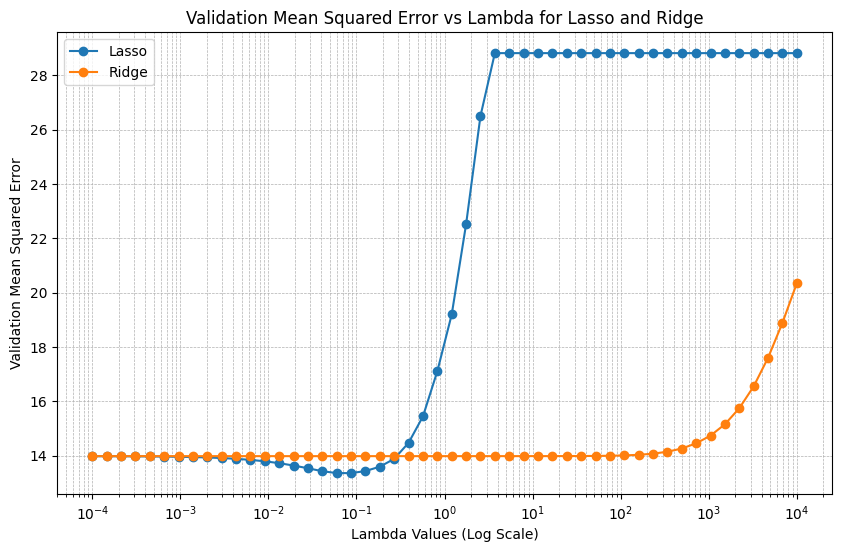

In [36]:
plot_lasso_ridge_errors(lasso_mse=lasso_mse, ridge_mse=ridge_mse)

In [37]:
best_lasso_lambda = min(lasso_mse, key=lasso_mse.get)
best_ridge_lambda = min(ridge_mse, key=ridge_mse.get)

In [38]:
mse_lasso = lasso_mse[best_lasso_lambda]
mse_ridge = ridge_mse[best_ridge_lambda]

In [39]:
# mean squared error for three models - classical linear regression, Ridge and Lasso
print(f"Mean Squared Error for Linear Regression: {mse_lr}")
print(f"Mean Squared Error for Ridge Regression: {mse_ridge} with lambda: {best_ridge_lambda}")
print(f"Mean Squared Error for Lasso Regression: {mse_lasso} with lambda: {best_lasso_lambda}")

Mean Squared Error for Linear Regression: 13.9870508554283
Mean Squared Error for Ridge Regression: 13.987050860238348 with lambda: 0.0001
Mean Squared Error for Lasso Regression: 13.361993262136169 with lambda: 0.08685113737513521


In [40]:
# check non-zero coefficients for Lasso model with best lambda value to verify extent of feature selection/regularization
df_train_clean.drop(columns="target").loc[:, lasso_coeffs[best_lasso_lambda] > 0]

,f_11,f_21,f_29,f_35,f_36,f_54,f_70,f_92,f_94,f_101,f_147,f_175,f_193,f_195,f_196,f_205,f_218,f_243,f_246,f_215_orange,f_237_Mexico,f_237_USA
0,0.367,0.051,-1.586,0.463,1.789,0.702,0.221,-0.759,0.734,0.115,-0.731,0.639,1.619,0.539000,-0.782,-0.789,-0.081,-0.384,-0.920,0.0,0.0,0.0
1,0.782,-0.804,-0.776,0.670,-1.772,0.235,0.080,0.945,-0.445,-1.144,-0.781,-0.558,-0.675,0.561000,0.965,-0.073,-0.423,-0.415,-0.061,0.0,0.0,0.0
2,-0.636,-0.188,-0.435,1.208,0.178,0.053,0.594,0.931,1.244,1.072,0.552,0.932,1.293,0.751000,-1.321,0.128,-0.560,0.443,1.073,1.0,0.0,0.0
3,-0.276,-0.910,1.043,0.060,-0.850,-0.187,0.592,1.014,-1.914,0.391,0.879,-0.217,-0.141,-0.321000,-0.248,-0.560,-0.166,1.141,-0.136,0.0,0.0,1.0
4,0.180,1.418,1.683,-0.456,-1.065,1.311,0.534,0.774,1.196,-0.205,-0.568,1.259,-1.709,0.610000,0.052,1.810,0.953,-0.335,-0.877,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.460,0.338,-0.325,0.790,1.329,0.938,-1.591,0.041,-0.294,1.255,0.675,1.407,0.083,-0.194000,0.728,0.082,-1.678,0.591,0.622,0.0,0.0,0.0
4996,0.523,2.440,0.800,-0.618,1.287,0.407,0.903,-1.268,0.243,0.737,-0.723,-1.160,-0.742,-0.375000,-0.425,0.068,-0.006,0.078,-0.374,0.0,0.0,0.0
4997,0.258,-0.621,0.332,-1.992,-2.348,0.643,0.884,0.919,-0.646,0.831,2.124,-0.159,0.639,0.302303,-0.484,0.152,-0.156,0.115,-0.527,0.0,1.0,0.0
4998,-0.924,1.021,1.342,-0.234,1.316,-0.744,0.241,-0.643,1.942,-0.991,0.559,0.019,-0.691,0.382000,0.066,2.057,0.471,0.336,0.517,0.0,0.0,1.0


#### Implement cross validation for classical linear regression, ridge and lasso

In [41]:
ridge_mse = {}
for i in lambdas:
    ridge = Ridge(alpha=i)
    ridge_mse[i] = k_fold_cross_validation(df=df_train_clean, k=10, model=ridge)

c:\Users\meeta\OneDrive\Documents\py_projects\synthetic_pred\.synthetic_pred\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
c:\Users\meeta\OneDrive\Documents\py_projects\synthetic_pred\.synthetic_pred\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
c:\Users\meeta\OneDrive\Documents\py_projects\synthetic_pred\.synthetic_pred\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
c:\Users\meeta\OneDrive\Documents\py_projects\synthetic_pred\.synthetic_pred\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureW

In [42]:
lasso_mse = {}
for i in lambdas:
    lasso = Lasso(alpha=i)
    lasso_mse[i] =  k_fold_cross_validation(df=df_train_clean, k=10, model=lasso)

c:\Users\meeta\OneDrive\Documents\py_projects\synthetic_pred\.synthetic_pred\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
c:\Users\meeta\OneDrive\Documents\py_projects\synthetic_pred\.synthetic_pred\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
c:\Users\meeta\OneDrive\Documents\py_projects\synthetic_pred\.synthetic_pred\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
c:\Users\meeta\OneDrive\Documents\py_projects\synthetic_pred\.synthetic_pred\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureW

In [43]:
lr = LinearRegression()
lr_mse = k_fold_cross_validation(df=df_train_clean, k=10, model=lr)

c:\Users\meeta\OneDrive\Documents\py_projects\synthetic_pred\.synthetic_pred\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [44]:
best_lasso_lambda = min(lasso_mse, key=lasso_mse.get)
best_ridge_lambda = min(ridge_mse, key=ridge_mse.get)

In [45]:
print(f"Mean Squared Error for Linear Regression: {lr_mse}")
print(f"Mean Squared Error for Ridge Regression: {ridge_mse[best_ridge_lambda]} with lambda: {best_ridge_lambda}")
print(f"Mean Squared Error for Lasso Regression: {lasso_mse[best_lasso_lambda]} with lambda: {best_lasso_lambda}")

Mean Squared Error for Linear Regression: 10.810302020860142
Mean Squared Error for Ridge Regression: 10.749265895096963 with lambda: 232.99518105153672
Mean Squared Error for Lasso Regression: 10.033769747702161 with lambda: 0.05963623316594643


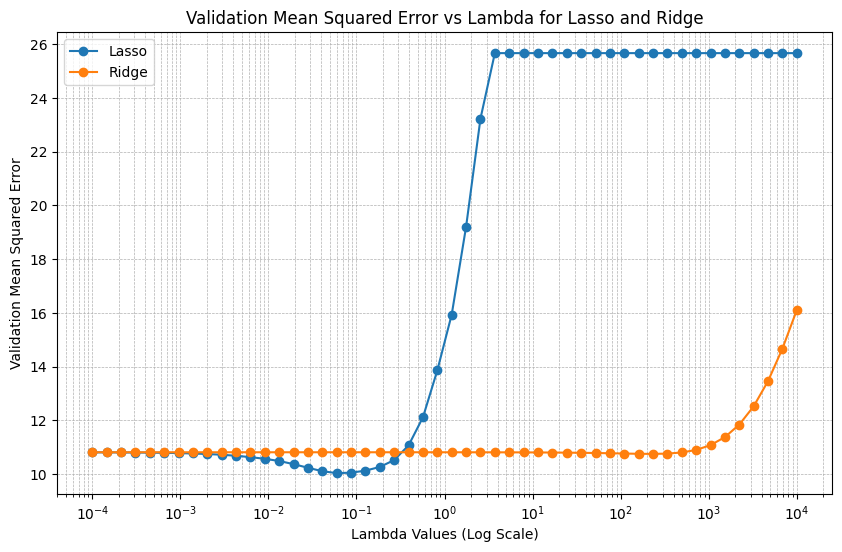

In [46]:
plot_lasso_ridge_errors(lasso_mse=lasso_mse, ridge_mse=ridge_mse)

In [47]:
# Assuming best lambda values for Lasso model, how simplified are the models in terms of non-zero coefficients
lasso = Lasso(alpha=best_lasso_lambda)
lasso.fit(df_train_clean.drop(columns="target"), df_train_clean["target"])
lasso_coeffs = lasso.coef_
df_train_clean.drop(columns="target").loc[:, lasso_coeffs > 0]

,f_17,f_20,f_22,f_29,f_35,f_36,f_54,f_60,f_67,f_70,f_74,f_92,f_94,f_101,f_116,f_142,f_147,f_169,f_175,f_193,f_196,f_200,f_205,f_218,f_238,f_237_Mexico,f_237_USA
0,1.245,0.454000,-0.076000,-1.586,0.463,1.789,0.702,1.330,-1.627,0.221,0.172,-0.759,0.734,0.115,-0.14664,-1.306,-0.731,0.866,0.639,1.619,-0.782,1.587,-0.789,-0.081,0.793,0.0,0.0
1,-1.550,-1.061000,0.001000,-0.776,0.670,-1.772,0.235,0.566,0.234,0.080,-1.675,0.945,-0.445,-1.144,-1.66400,-0.934,-0.781,-1.116,-0.558,-0.675,0.965,-1.413,-0.073,-0.423,0.937,0.0,0.0
2,0.528,-0.901000,-0.391913,-0.435,1.208,0.178,0.053,-0.305,-1.080,0.594,-1.967,0.931,1.244,1.072,-0.34200,0.948,0.552,1.136,0.932,1.293,-1.321,-0.069,0.128,-0.560,0.928,0.0,0.0
3,-0.137,0.220596,-0.905000,1.043,0.060,-0.850,-0.187,0.434,-0.718,0.592,-0.692,1.014,-1.914,0.391,1.66100,0.167,0.879,-0.487,-0.217,-0.141,-0.248,-1.221,-0.560,-0.166,-0.321,0.0,1.0
4,1.216,-0.511000,-0.032000,1.683,-0.456,-1.065,1.311,1.324,-0.361,0.534,-0.252,0.774,1.196,-0.205,0.69000,-0.303,-0.568,0.912,1.259,-1.709,0.052,0.306,1.810,0.953,0.170,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.233,-0.243000,0.803000,-0.325,0.790,1.329,0.938,-0.971,1.727,-1.591,-0.667,0.041,-0.294,1.255,0.05100,-0.249,0.675,-0.177,1.407,0.083,0.728,0.676,0.082,-1.678,1.028,0.0,0.0
4996,0.617,-1.804000,-1.264000,0.800,-0.618,1.287,0.407,-1.287,-1.188,0.903,-1.913,-1.268,0.243,0.737,1.15000,-0.214,-0.723,0.856,-1.160,-0.742,-0.425,-0.308,0.068,-0.006,0.946,0.0,0.0
4997,-0.337,-0.946000,0.350000,0.332,-1.992,-2.348,0.643,0.164,1.579,0.884,-0.012,0.919,-0.646,0.831,0.78800,-0.667,2.124,-0.186,-0.159,0.639,-0.484,-0.607,0.152,-0.156,0.565,1.0,0.0
4998,-0.480,0.641000,0.343000,1.342,-0.234,1.316,-0.744,-1.006,0.179,0.241,-1.927,-0.643,1.942,-0.991,-0.35800,-1.809,0.559,0.806,0.019,-0.691,0.066,1.237,2.057,0.471,0.206,0.0,1.0


In [48]:
# Assuming best lambda values for Ridge model, how simplified are the models in terms of non-zero coefficients
ridge = Ridge(alpha=best_ridge_lambda)
ridge.fit(df_train_clean.drop(columns="target"), df_train_clean["target"])
ridge_coeffs = ridge.coef_
df_train_clean.drop(columns="target").loc[:, ridge_coeffs > 0]

,f_0,f_3,f_4,f_5,f_6,f_7,f_9,f_11,f_13,f_14,f_17,f_19,f_20,f_21,f_22,f_24,f_26,f_28,f_29,f_30,f_34,f_35,f_36,f_38,f_41,f_42,f_43,f_45,f_47,f_54,f_57,f_58,f_59,f_60,f_65,f_67,f_68,f_70,f_71,f_73,f_74,f_82,f_83,f_86,f_90,f_91,f_92,f_94,f_95,f_101,f_107,f_108,f_109,f_110,f_112,f_116,f_117,f_118,f_121,f_122,f_130,f_131,f_132,f_137,f_140,f_142,f_144,f_147,f_148,f_149,f_151,f_152,f_153,f_155,f_157,f_158,f_160,f_161,f_166,f_167,f_169,f_171,f_173,f_174,f_175,f_176,f_177,f_178,f_180,f_182,f_183,f_185,f_187,f_188,f_190,f_192,f_193,f_194,f_195,f_196,f_200,f_204,f_205,f_208,f_210,f_213,f_216,f_218,f_219,f_221,f_222,f_223,f_227,f_228,f_229,f_232,f_233,f_235,f_238,f_240,f_241,f_242,f_243,f_244,f_246,f_248,f_252,f_253,f_215_orange,f_237_Mexico,f_237_USA
0,-0.653,-1.833,-0.736,0.028048,1.115,-0.171,-0.129,0.367,2.359,-0.469,1.245,1.438,0.454000,0.051,-0.076000,-1.439,0.167,0.475,-1.586,-2.020,1.181,0.463,1.789,0.545,-0.421,1.456,-0.727,1.809,-0.245,0.702,0.438000,-0.907,0.053264,1.330,0.634,-1.627,0.791,0.221,0.493,-0.491,0.172,-0.468,0.248000,-1.857,0.982,0.459,-0.759,0.734,-2.218,0.115,0.596000,0.45651,1.645,2.074,0.667000,-0.14664,0.183,-0.202,3.0,1.019,-0.626,-0.457813,-0.050,0.197,-0.057000,-1.306,0.440,-0.731,-2.168,0.52635,0.428,-0.981,0.361,0.800,-1.287,0.780,0.170,-0.371,1.642,-1.261,0.866,-0.877,-1.393,0.366000,0.639,-1.657,0.468,0.120,1.920,-0.178,0.748,0.988,1.047,-1.062,-2.081,-1.095,1.619,1.262,0.539000,-0.782,1.587,-2.004,-0.789,-0.164,0.478000,0.202,1.190,-0.081,0.256,0.868,0.604,0.212,0.836,0.973000,-0.050,-0.781,-0.909,1.153,0.793,0.261,0.664,0.585,-0.384,-1.607,-0.920,-0.945,-1.244,-0.503,0.0,0.0,0.0
1,1.179,0.811,-0.468,-0.005000,-0.116,-1.243,-1.019,0.782,-1.156,-1.198,-1.550,-1.080,-1.061000,-0.804,0.001000,-0.505,-0.155,-1.647,-0.776,1.337,2.026,0.670,-1.772,-1.542,-0.510,1.531,0.051,-0.441,0.901,0.235,0.769000,-0.488,-1.586000,0.566,-1.696,0.234,1.058,0.080,0.265,-1.232,-1.675,-1.340,0.788000,2.952,-0.066,-0.984,0.945,-0.445,0.569,-1.144,1.781000,-0.31200,-0.407,0.097,-1.841000,-1.66400,0.048,-0.309,0.0,-0.941,-0.712,0.601000,0.364,-0.368,-1.596000,-0.934,0.532,-0.781,-0.426,1.41200,-1.241,-0.232,0.794,1.151,0.448,0.103,-0.376,0.452,1.454,-0.686,-1.116,-0.458,-0.207,-0.733000,-0.558,-1.038,-0.105,0.845,0.310,0.778,0.280,0.684,1.203,1.309,0.183,-0.868,-0.675,0.239,0.561000,0.965,-1.413,0.325,-0.073,0.758,-0.134000,2.286,-0.040,-0.423,0.684,-1.160,-0.646,-2.800,1.970,-0.267000,-0.697,-0.166,0.542,0.425,0.937,0.236,-0.578,-0.529,-0.415,1.282,-0.061,-0.061,0.821,-0.260,0.0,0.0,0.0
2,0.181,0.113,0.887,-0.762000,1.872,-1.709,1.091,-0.636,0.284,-0.788,0.528,0.258,-0.901000,-0.188,-0.391913,0.549,-2.057,-0.784,-0.435,-1.962,-0.023,1.208,0.178,-1.214,0.995,-0.693,1.185,-0.267,0.446,0.053,-0.088000,0.752,0.161000,-0.305,-0.913,-1.080,-0.532,0.594,-0.022,1.208,-1.967,-1.471,-0.278000,0.371,-0.243,-0.420,0.931,1.244,0.540,1.072,0.098000,-0.72300,0.118,-1.504,-0.160000,-0.34200,-0.638,0.394,1.0,0.477,-3.359,0.226000,0.246,0.383,0.518000,0.948,0.135,0.552,-0.333,-1.83300,-1.316,0.961,-0.389,0.852,-1.656,2.070,-0.039,-0.025,0.370,-1.549,1.136,-0.043,0.510,-0.477000,0.932,1.474,0.142,-0.918,1.737,1.839,-1.534,0.391,-1.605,0.237,-0.148,0.272,1.293,0.184,0.751000,-1.321,-0.069,-1.031,0.128,1.493,0.116348,1.314,-0.177,-0.560,-2.308,0.712,-0.285,-0.153,1.261,-0.416000,-0.571,-0.392,-0.251,-0.081,0.928,0.501,-0.649,1.911,0.443,-0.237,1.073,0.570,-1.147,2.580,1.0,0.0,0.0
3,0.745,1.163,-0.169,-0.151000,-1.100,0.225,0.626,-0.276,0.539,-0.061,-0.137,0.476,0.220596,-0.910,-0.905000,-0.221,0.406,0.077,1.043,1.326,-1.399,0.060,-0.850,0.732,-0.870,1.104,-1.161,-1.225,-0.247,-0.187,0.292000,-0.029,1.079000,0.434,0.027,-0.718,-0.097,0.592,0.046,0.253,-0.692,0.674,0.957000,1.264,-1.490,0.083,1.014,-1.914,-0.470,0.391,-0.856000,0.38300,0.035,0.080,0.332445,1.66100,-0.831,-0.265,2.0,0.539,0.579,0.932000,-0.482,-0.043,-0.128000,0.167,-0.295,0.879,1.327,0.51600,0.283,-0.172,-1.762,1.163,-0.524,1.016,-0.944,-0.562,-1.035,0.188,-0.487,-0.193,-0.263,-0.9900